In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import datetime

%matplotlib notebook

In [2]:
fname = '../pi/data/2018-08-04.csv'
all_data = pd.read_csv(fname, sep='\t')

In [3]:
good_data = all_data.dropna(how='any')

good_data['datetime'] = good_data['datetime'].apply(pd.datetime.strptime, args=("%Y-%m-%d %H:%M:%S",))
good_data['date'] = good_data['datetime'].apply(pd.datetime.date)
good_data['time'] = good_data['datetime'].apply(pd.datetime.time)
good_data = good_data.sort_values(by='datetime')
# good_data = good_data.set_index('datetime')
    
good_data.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,boat_COG,boat_lat,boat_lon,boat_speed,datetime,pressure,skiff_COG,skiff_lat,skiff_lon,skiff_speed,temp,date,time
128,92.242,60.8193,-148.158,0.1306,2018-08-04 06:08:01,112.2580,1.683530e-16,1.346820e-34,4.623070e-33,7.502300e-15,2.96000,2018-08-04,06:08:01
143,95.522,60.8190,-148.157,0.4518,2018-08-04 06:09:16,99.2647,2.592300e+02,6.081860e+01,-1.481510e+02,2.400000e-01,3.09260,2018-08-04,06:09:16
144,85.812,60.8190,-148.157,0.3572,2018-08-04 06:09:21,99.2667,2.417660e+02,6.081860e+01,-1.481510e+02,3.500000e-01,3.10429,2018-08-04,06:09:21
146,88.354,60.8190,-148.157,0.1646,2018-08-04 06:09:32,99.2674,2.232800e+02,6.081850e+01,-1.481510e+02,3.960000e-01,3.10819,2018-08-04,06:09:32
147,87.612,60.8190,-148.157,0.2768,2018-08-04 06:09:38,99.2899,2.438460e+02,6.081860e+01,-1.481510e+02,3.740000e-01,3.11209,2018-08-04,06:09:38


In [4]:
good_data.describe()

,boat_COG,boat_lat,boat_lon,boat_speed,pressure,skiff_COG,skiff_lat,skiff_lon,skiff_speed,temp
count,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2.822000e+03,2.822000e+03,2.822000e+03,2.822000e+03,2822.000000
mean,173.334543,60.766108,-148.133725,1.192574,107.782748,1.696722e+02,6.055787e+01,-1.480340e+02,1.674653e+00,3.829455
std,95.505542,0.020569,0.040278,1.203101,25.903444,8.492113e+01,1.715923e+00,3.240727e+00,2.152990e+00,1.978325
min,0.030000,60.751420,-148.172755,0.064889,99.215000,1.683530e-16,1.346820e-34,-1.481728e+02,7.502300e-15,1.311083
25%,96.396750,60.755773,-148.145838,0.412775,100.050241,1.067152e+02,6.075615e+01,-1.481471e+02,2.540000e-01,2.888787
50%,166.728250,60.756392,-148.143812,0.701100,102.473576,1.656985e+02,6.075694e+01,-1.481452e+02,6.670000e-01,3.879946
75%,252.828333,60.758174,-148.140828,1.524700,108.858927,2.373986e+02,6.075770e+01,-1.481418e+02,2.006639e+00,4.617055
max,359.860000,60.819300,-147.979829,16.708500,627.773000,3.544270e+02,6.081860e+01,4.623070e-33,8.076666e+00,35.578500


Remove the entries with bogus entries, for instance look at the minimum skiff latitude and max pressure

In [5]:
good_data = good_data[good_data['skiff_lat'] > 59]
good_data = good_data[good_data['pressure'] < 115]
good_data = good_data[good_data['pressure'].diff().abs() < 1]
good_data.describe()

,boat_COG,boat_lat,boat_lon,boat_speed,pressure,skiff_COG,skiff_lat,skiff_lon,skiff_speed,temp
count,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000
mean,173.744612,60.765905,-148.132988,1.191553,104.422336,170.366393,60.766070,-148.133758,1.675162,3.724522
std,95.922731,0.020320,0.041127,1.192522,4.522365,85.341087,0.020196,0.041290,2.151199,1.251190
min,0.030000,60.751420,-148.172755,0.064889,99.218391,2.361000,60.680738,-148.172821,0.007000,1.311083
25%,95.734500,60.755778,-148.145745,0.413700,99.944072,107.160497,60.756291,-148.147010,0.255278,2.832192
50%,166.752500,60.756412,-148.143710,0.701500,102.276106,165.575995,60.756947,-148.145089,0.673000,3.793186
75%,253.996000,60.758110,-148.140753,1.532967,108.440487,238.510440,60.757875,-148.141750,2.006278,4.578571
max,359.860000,60.819100,-147.979829,16.708500,113.177373,354.426990,60.818600,-147.979900,8.076666,7.050344


In [6]:
good_data

,boat_COG,boat_lat,boat_lon,boat_speed,datetime,pressure,skiff_COG,skiff_lat,skiff_lon,skiff_speed,temp,date,time
144,85.812000,60.819000,-148.157000,0.357200,2018-08-04 06:09:21,99.266700,241.766000,60.818600,-148.151000,0.350000,3.104290,2018-08-04,06:09:21
146,88.354000,60.819000,-148.157000,0.164600,2018-08-04 06:09:32,99.267400,223.280000,60.818500,-148.151000,0.396000,3.108190,2018-08-04,06:09:32
147,87.612000,60.819000,-148.157000,0.276800,2018-08-04 06:09:38,99.289900,243.846000,60.818600,-148.151000,0.374000,3.112090,2018-08-04,06:09:38
148,78.178000,60.819000,-148.157000,0.362200,2018-08-04 06:09:43,99.225000,245.598000,60.818600,-148.151000,0.430000,3.108190,2018-08-04,06:09:43
149,72.662500,60.819000,-148.157000,0.366500,2018-08-04 06:09:48,99.273700,248.970000,60.818600,-148.151000,0.440000,3.113060,2018-08-04,06:09:48
150,76.202000,60.819100,-148.157000,0.316000,2018-08-04 06:09:51,99.313100,221.546000,60.818600,-148.151000,0.312000,3.119890,2018-08-04,06:09:51
151,80.294000,60.819000,-148.157000,0.286200,2018-08-04 06:09:58,99.248800,152.542000,60.818600,-148.151000,0.250000,3.127680,2018-08-04,06:09:58
152,54.434000,60.819000,-148.157000,0.248800,2018-08-04 06:10:03,99.293200,211.074000,60.818600,-148.151000,0.296000,3.131580,2018-08-04,06:10:03
153,59.556000,60.819100,-148.157000,0.361200,2018-08-04 06:10:08,99.270700,241.474000,60.818600,-148.151000,0.466000,3.127680,2018-08-04,06:10:08
154,50.860000,60.819100,-148.157000,0.370500,2018-08-04 06:10:13,99.278700,208.305000,60.818500,-148.151000,0.407500,3.142300,2018-08-04,06:10:13


In [48]:
good_data['F'] = good_data['temp']*(9/5) +32

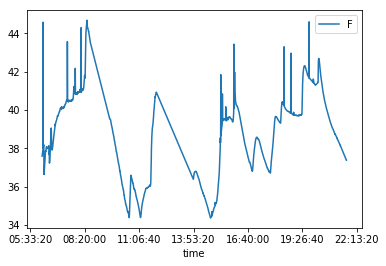

In [49]:
# len(good_data)
%matplotlib inline
# %matplotlib large
# %matplotlib notebook

good_data.plot(x='time', y='F')

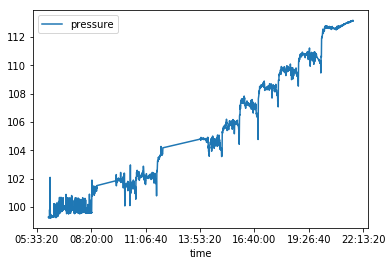

In [46]:
good_data.plot(x='time', y='pressure')

In [34]:
time_jumps  = good_data[good_data['datetime'].diff() > pd.Timedelta(minutes=5)]

In [38]:
time_jumps

,boat_COG,boat_lat,boat_lon,boat_speed,datetime,pressure,skiff_COG,skiff_lat,skiff_lon,skiff_speed,temp,date,time
1406,158.8840,60.757616,-148.140672,0.227400,2018-08-04 09:35:45,101.843458,128.358566,60.757477,-148.140433,0.155714,4.212401,2018-08-04,09:35:45
2940,108.8340,60.756562,-148.140974,2.182900,2018-08-04 13:52:41,104.777467,107.604996,60.756690,-148.141074,0.885000,2.432662,2018-08-04,13:52:41
5112,350.2425,60.751777,-148.132912,0.840333,2018-08-04 19:56:53,110.377143,256.452218,60.752712,-148.133482,1.205556,5.273416,2018-08-04,19:56:53


In [45]:
good_data[2940]

KeyError: 2940